# Quantium Virtual Internship - Retail Strategy and Analytics - Task 1

In [1]:
#### Loading required libraries
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
#### Reading data files into data frames
trans_df = pd.read_excel('QVI_transaction_data.xlsx', engine='openpyxl')

In [3]:
trans_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


## Exploratory Data Analysis

Examining the dataset and performing quality analysis.

In [4]:
#### Checking the data types
trans_df.info()
trans_df_copy = trans_df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


As we are examining the chip purchase, we should check that we are looking at the right products by examining PROD_NAME.

In [5]:
#### View all unique entries in the product name column 
trans_df['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

We are only interested in words that will tell us if the product is chips or not, let’s remove all words with
digits and special characters such as ‘&’ from our set of product words

In [6]:
#### Remove digits from the product names
prod_name = trans_df['PROD_NAME'].str.replace(r'[0-9]+[gG]','');

#### Remove & characters from the product names and replace with a space to separate flavours
prod_name = prod_name.str.replace(r'&',' ');

C:\Users\Rajani Yadav\AppData\Local\Temp\ipykernel_13964\3102121425.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  prod_name = trans_df['PROD_NAME'].str.replace(r'[0-9]+[gG]','');


Basic text analysis by summarising the individual words in the product name.

In [7]:
#### Count the frequencies of words in product names and display counts in descending order
word_counts = pd.Series(' '.join(prod_name).split()).value_counts()

with pd.option_context('display.max_rows', None): # show all rows
  display(word_counts)

Chips              49770
Kettle             41288
Smiths             28860
Salt               27976
Cheese             27890
Pringles           25102
Doritos            24962
Crinkle            23960
Corn               22063
Original           21560
Cut                20754
Chip               18645
Chicken            18577
Salsa              18094
Chilli             15390
Sea                14145
Thins              14075
Sour               13882
Crisps             12607
Vinegar            12402
RRD                11894
Sweet              11060
Infuzions          11057
Supreme            10963
Chives             10951
Cream              10723
WW                 10320
Popd                9693
Cobs                9693
Tortilla            9580
Tostitos            9471
Twisties            9454
BBQ                 9434
Sensations          9429
Lime                9347
Paso                9324
Dip                 9324
Old                 9324
El                  9324
Tomato              7669


Some entries in our data are salsas; we want to remove these.

In [8]:
#### Removing salsa products from dataset
trans_df=trans_df[trans_df['PROD_NAME'].str.contains(r"[Ss]alsa") == False]
trans_df.shape # check for a reduction in no of rows 

(246742, 8)

We can use summary() to check summary statistics such as mean, min and max values for each
feature to see if there are any obvious outliers in the data and if there are any nulls in any of the columns

In [9]:
#### Create summaries of the transaction data
trans_df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


There are no nulls in the columns but product quantity appears to have an outlier.
Investigating further the case where 200 packets of chips are bought in one transaction.

In [10]:
trans_df[trans_df["PROD_QTY"] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


There are two transactions where 200 packets of chips are bought in one transaction and both of these
transactions where by the same customer

In [11]:
#### Filter the entires by the customer
trans_df.loc[trans_df['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


It looks like this is the only purchase they have made so we will remove these transactions from the dataset.

In [12]:
#### Removing the transactions 
trans_df = trans_df[trans_df["LYLTY_CARD_NBR"] != 226000]
trans_df.shape # check for a reduction of 2 rows (i.e. 246740 rows)

(246740, 8)

In [13]:
#### Rechecking the data summary 
trans_df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


There are no outliers. Checking the number of transaction lines over time to see if there are any obvious data
issues such as missing data 

In [14]:
#### Count of transaction per date/#total no. of transaction of each date
date_df = trans_df["DATE"].value_counts().reset_index()
date_df = date_df.rename(columns={'index':'DATE', 'DATE':'n_trans'})
date_df

,DATE,n_trans
0,2018-12-24,865
1,2018-12-23,853
2,2018-12-22,840
3,2018-12-19,839
4,2018-12-20,808
...,...,...
359,2019-06-24,612
360,2018-10-18,611
361,2018-11-25,610
362,2018-09-22,609


<AxesSubplot:xlabel='DATE'>

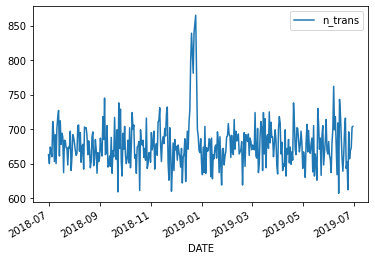

In [15]:
#### Orders transaction maximaum no. of order
date_df.plot('DATE', 'n_trans', kind='line')

We can see that there is an increase in purchases in December and a break in late December.Looking more into it.

In [16]:
#### Filter to December and look at individual days
#per day order frrequency for the month of december(max)
df_dec = trans_df[trans_df["DATE"].dt.month == 12].sort_values("DATE").reset_index(drop=True)
df_dec
#day_freq = df_dec['day'].value_counts().reset_index().rename(columns={'index':'day', 'day':'freq'})
#day_freq
#visualization for the month of Dec
#day_freq.plot('day', 'freq', kind='scatter')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-12-01,78,78020,75585,47,Doritos Corn Chips Original 170g,2,8.8
1,2018-12-01,226,226081,226633,40,Thins Chips Seasonedchicken 175g,2,6.6
2,2018-12-01,196,196041,195650,6,RRD Lime & Pepper 165g,2,6.0
3,2018-12-01,165,165023,165501,14,Smiths Crnkle Chip Orgnl Big Bag 380g,2,11.8
4,2018-12-01,106,106054,107078,84,GrnWves Plus Btroot & Chilli Jam 180g,2,6.2
...,...,...,...,...,...,...,...,...
21220,2018-12-31,107,107226,109651,25,Pringles SourCream Onion 134g,2,7.4
21221,2018-12-31,166,166275,168363,15,Twisties Cheese 270g,2,9.2
21222,2018-12-31,148,148080,147473,23,Cheezels Cheese 330g,1,5.7
21223,2018-12-31,10,10158,9985,98,NCC Sour Cream & Garden Chives 175g,2,6.0


We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on
Christmas day itself. This is due to shops being closed on Christmas day.

Now there is no outliers in the dataset.we can move on to creating other features such as brand of chips or pack size from PROD_NAME.

In [17]:
#### Adding pack_size of each product to the dataset
trans_df['PACK_SZ'] = trans_df['PROD_NAME'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
trans_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SZ
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150


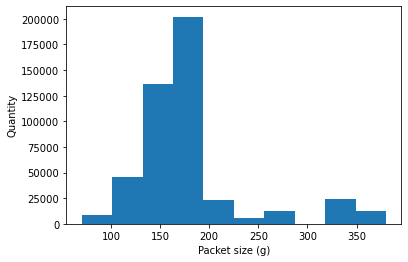

In [18]:
#### histogram to visualize the distribution of pack sizes.
plt.hist(trans_df['PACK_SZ'], weights = trans_df['PROD_QTY']);
plt.xlabel('Packet size (g)');
plt.ylabel('Quantity');

Pack sizes created look reasonable and now to create brands, we can use the first word in PROD_NAME to
work out the brand name

In [19]:
#### Adding brand names to the dataset
trans_df['BRAND_NAME'] = trans_df['PROD_NAME'].apply(lambda x: x.split()[0])
trans_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SZ,BRAND_NAME
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle
...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos


In [20]:
#### Then print all unique entries to check the brand names created
trans_df["BRAND_NAME"].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

In [21]:
#### no. of orders for the particular brand
trans_df['BRAND_NAME'].value_counts()

Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: BRAND_NAME, dtype: int64

In [22]:
#### clean the brand name

Now we want to examine the customer data. We can generate summaries and check the categories in this dataset.

In [23]:
cust_df = pd.read_csv('QVI_purchase_behaviour.csv')
cust_df_copy = cust_df.copy()
cust_df.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [24]:
#### Check the summary of the customer data
cust_df.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


Let’s have a closer look at the LIFESTAGE and PREMIUM_CUSTOMER columns.

In [25]:
#### Examining the values of lifestage and premium_customer
cust_df["LIFESTAGE"].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [26]:
cust_df["PREMIUM_CUSTOMER"].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

As there do not seem to be any issues with the customer data, we can now join the transaction and customer data sets together

In [27]:
#### Merge transaction data to customer data
full_df = pd.merge(trans_df, cust_df, on=['LYLTY_CARD_NBR'], how='left')
full_df

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SZ,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,Kettle,YOUNG SINGLES/COUPLES,Premium
246736,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175,Tostitos,YOUNG SINGLES/COUPLES,Premium
246737,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170,Doritos,YOUNG SINGLES/COUPLES,Premium
246738,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,Doritos,YOUNG SINGLES/COUPLES,Premium


In [28]:
#### Checking null values
full_df.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SZ             0
BRAND_NAME          0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

Retain this dataset which you can write out as a csv

In [29]:
######exporting data to csv.
full_df.to_csv('QVI_full_df.csv')

## Data analysis on customer segments 

As the data has been cleaned, we want to look for insights in the chip market to help recommend a business strategy. 

To do so, some metrics we want to consider are:
- Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment

Some more information from the data team that we could ask for, to analyse with the chip information for more insight includes 
- The customer’s total spend over the period and total spend for each transaction to understand what proportion of their grocery spend is on chips. 
- Spending on other snacks, such as crackers and biscuits, to determine the preference and the purchase frequency of chips compared to other snacks
- Proportion of customers in each customer segment overall to compare against the mix of customers who purchase chips

Firstly, we want to take a look at the split of the total sales by LIFESTAGE and MEMBER_TYPE.

In [30]:
#### calculating total sales by lifestage and member type and generate a list  
total_sales_cust = full_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'], as_index = False)['TOT_SALES'].agg(['sum'])
total_sales_cust = total_sales_cust.rename(columns={'sum': 'sum_tot_sales'})
total_sales_cust.sort_values(by = "sum_tot_sales", ascending = False)

sum_tot_sales
LIFESTAGE              PREMIUM_CUSTOMER               
OLDER FAMILIES         Budget                156863.75
YOUNG SINGLES/COUPLES  Mainstream            147582.20
RETIREES               Mainstream            145168.95
YOUNG FAMILIES         Budget                129717.95
OLDER SINGLES/COUPLES  Budget                127833.60
                       Mainstream            124648.50
                       Premium               123537.55
RETIREES               Budget                105916.30
OLDER FAMILIES         Mainstream             96413.55
RETIREES               Premium                91296.65
YOUNG FAMILIES         Mainstream             86338.25
MIDAGE SINGLES/COUPLES Mainstream             84734.25
YOUNG FAMILIES         Premium                78571.70
OLDER FAMILIES         Premium                75242.60
YOUNG SINGLES/COUPLES  Budget                 57122.10
MIDAGE SINGLES/COUPLES Premium                54443.85
YOUNG SINGLES/COUPLES  Premium                39052.30
MIDAGE SINGLES/COUPLES Budget                 33345.70
NEW FAMILIES           Budget                 20607.45
                       Mainstream             15979.70
                       Premium                10760.80

In [31]:
# Get the total sales 
total_sales = full_df['TOT_SALES'].agg(['sum'])['sum']
total_sales

1805177.6999999997

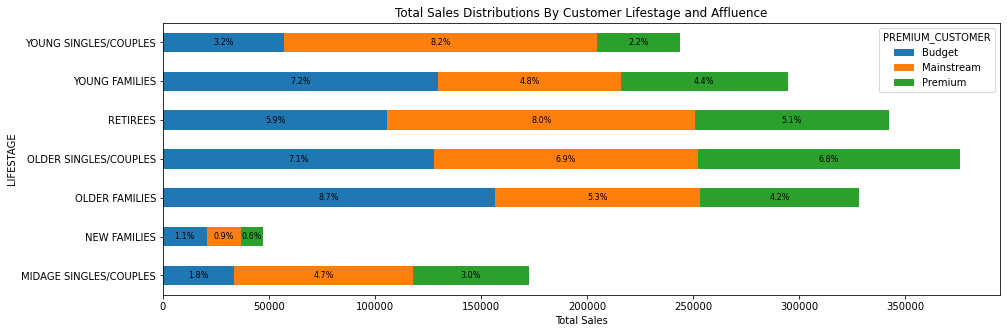

In [32]:
# Plot a breakdown of the total sales by lifestage and member type
total_sales_breakdown = full_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'], as_index = False)['TOT_SALES'].agg(['sum', 'mean']).unstack('PREMIUM_CUSTOMER').fillna(0)
ax = total_sales_breakdown['sum'].plot(kind='barh', stacked=True, figsize=(15, 5))

# Add percentages of the summed total sales as labels to each bar 
# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    label = width / total_sales * 100
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{(label):.1f}%' 
    
    # Set label positions
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
        
ax.set_xlabel("Total Sales")
ax.set_title('Total Sales Distributions By Customer Lifestage and Affluence')
plt.show()

Sales are coming mainly from Budget - older families, Mainstream - young singles/couples, and Mainstream retirees
We can check if the higher sales are due to there being more customers who buy chips.

In [33]:
#### Number of customers by LIFESTAGE and PREMIUM_CUSTOMER
len(cust_df['LYLTY_CARD_NBR'].unique()) == cust_df.shape[0]

True

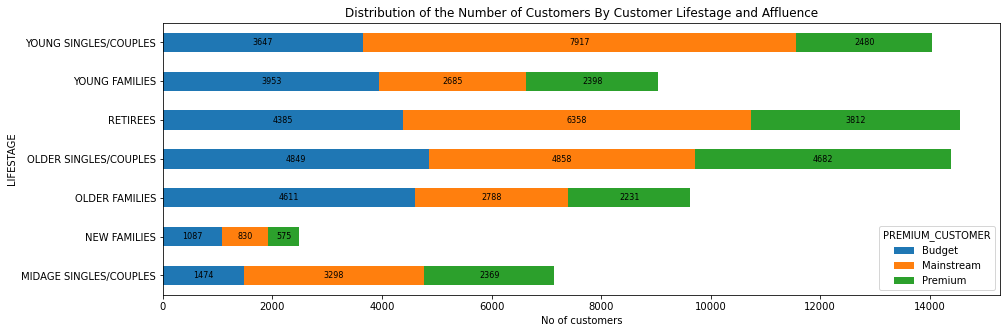

In [34]:
# Plot the numbers of customers in each segment by counting the unique LYLTY_CARD_NBR entries
sum_customers= full_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].agg('nunique').unstack('PREMIUM_CUSTOMER').fillna(0)
ax = sum_customers.plot(kind='barh', stacked=True, figsize=(15, 5))

# Add customer numbers as labels to each bar 
# .patches is everything inside of the chart
for rect in ax.patches:
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()
    
    label_text = f'{(width):.0f}'
    
    # Set label positions
    label_x = x + width / 2
    label_y = y + height / 2
    
    # only plot labels greater than given width
    if width > 0:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=8)
        
ax.set_xlabel("No of customers")
ax.set_title('Distribution of the Number of Customers By Customer Lifestage and Affluence')
plt.show()

There are more Young singles/couples - mainstream and Retirees - mainstream who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Older families - budget segment.

We can then take a look at the total and average units of chips bought per customer by LIFESTAGE and MEMBER_TYPE.

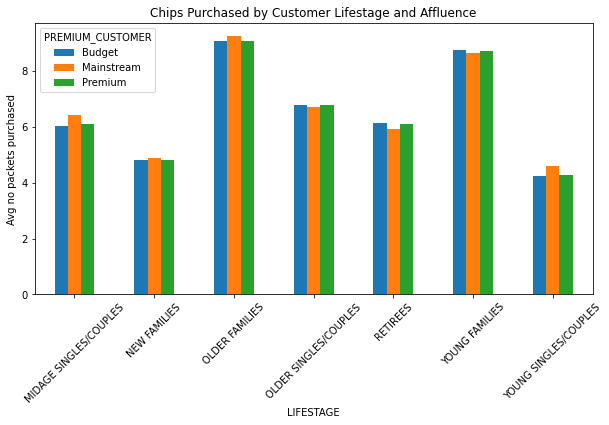

In [35]:
# Plot the average no of chip packets bought per customer by LIFESTAGE and MEMBER_TYPE.
no_packets_data = full_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PROD_QTY'].sum()/full_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique(0)
ax = no_packets_data.unstack('PREMIUM_CUSTOMER').fillna(0).plot.bar(stacked = False,figsize=(10, 5))
ax.set_ylabel("Avg no packets purchased")
ax.set_title('Chips Purchased by Customer Lifestage and Affluence')
plt.xticks(rotation=45)
plt.show()

Older families and young families in general buy more chips per customer. We can also investigate the average price per unit sold by LIFESTAGE and MEMBER_TYPE.

In [37]:
# Create a column for the unit price of chips purchased per transaction 
full_df['UNIT_PRICE'] = full_df['TOT_SALES']/full_df['PROD_QTY']

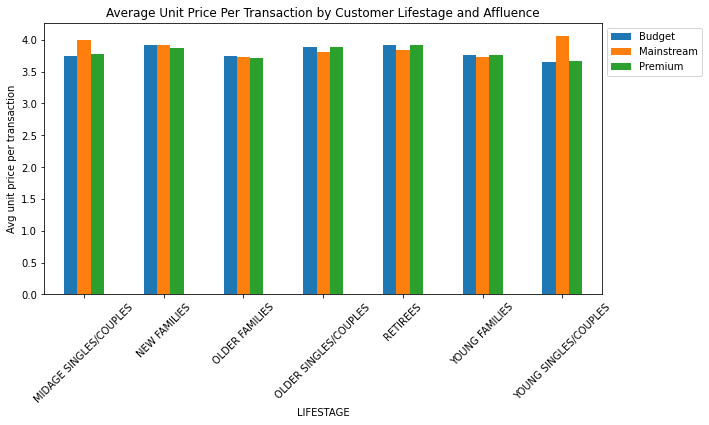

In [38]:
# Plot the distribution of the average unit price per transaction by LIFESTAGE and MEMBER_TYPE.
avg_priceperunit = full_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'], as_index = False)['UNIT_PRICE'].agg(['mean']).unstack('PREMIUM_CUSTOMER').fillna(0)
ax = avg_priceperunit['mean'].plot.bar(stacked=False, figsize=(10, 5))
ax.set_ylabel("Avg unit price per transaction")
ax.set_title('Average Unit Price Per Transaction by Customer Lifestage and Affluence')
plt.legend(loc = "upper left",bbox_to_anchor=(1.0, 1.0))
plt.xticks(rotation=45)
plt.show()

In [34]:
df1['flag_chip'] = df1['PROD_NAME'].apply(lambda x: 1 if 'chips' in x.lower().split() else 0) 
df1['flag_chip']

0         0
1         0
2         1
3         0
4         0
         ..
264831    0
264832    0
264833    0
264834    0
264835    0
Name: flag_chip, Length: 264836, dtype: int64

In [121]:
#chips
df1_chip = df1[df1["flag_chip"]==1]
df1_chip

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WGT,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER,flag_chip
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,1
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,Smiths,MIDAGE SINGLES/COUPLES,Budget,1
10,2019-05-17,7,7215,7176,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,330,Smiths,MIDAGE SINGLES/COUPLES,Budget,1
14,2019-05-15,19,19272,16686,44,Thins Chips Light& Tangy 175g,1,3.3,175,Thins,MIDAGE SINGLES/COUPLES,Budget,1
33,2019-05-18,45,45220,41651,22,Thins Chips Originl saltd 175g,1,3.3,175,Thins,MIDAGE SINGLES/COUPLES,Budget,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264809,2018-08-24,271,271051,268506,47,Doritos Corn Chips Original 170g,2,8.8,170,Doritos,YOUNG SINGLES/COUPLES,Premium,1
264815,2018-11-04,271,271193,269365,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,110,Cobs,YOUNG SINGLES/COUPLES,Premium,1
264816,2019-05-29,271,271193,269366,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110,Cobs,YOUNG SINGLES/COUPLES,Premium,1
264826,2019-03-25,272,272194,269908,75,Cobs Popd Sea Salt Chips 110g,2,7.6,110,Cobs,YOUNG SINGLES/COUPLES,Premium,1


<AxesSubplot:>

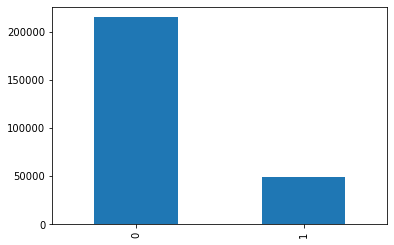

In [40]:
df1["flag_chip"].value_counts().plot(kind= "bar")

In [161]:
#no. of chips bought per customer segment/ prodqty- sum/count??
df1_count_chip = df1.groupby(["PREMIUM_CUSTOMER", "LIFESTAGE"]).agg(
    c_chips = pd.NamedAgg('PROD_QTY', sum)).reset_index()

In [162]:
df1_count_chip

,PREMIUM_CUSTOMER,LIFESTAGE,c_chips
0,Budget,MIDAGE SINGLES/COUPLES,9496
1,Budget,NEW FAMILIES,5571
2,Budget,OLDER FAMILIES,45065
3,Budget,OLDER SINGLES/COUPLES,35220
4,Budget,RETIREES,28764
5,Budget,YOUNG FAMILIES,37111
6,Budget,YOUNG SINGLES/COUPLES,16671
7,Mainstream,MIDAGE SINGLES/COUPLES,22699
8,Mainstream,NEW FAMILIES,4319
9,Mainstream,OLDER FAMILIES,27756


In [163]:
df1_chip.groupby("LYLTY_CARD_NBR")["PROD_QTY"].sum().max()

14

In [164]:
#customer who bought max no. of chips
df_LGP= df1_chip.groupby(["LYLTY_CARD_NBR","PREMIUM_CUSTOMER","LIFESTAGE"]).agg(
    n_chips = pd.NamedAgg('PROD_QTY', sum)).reset_index()

In [149]:
df_LGP[df_LGP['n_chips']==df_LGP['n_chips'].max()]

,LYLTY_CARD_NBR,PREMIUM_CUSTOMER,LIFESTAGE,n_chips
18213,144121,Budget,OLDER FAMILIES,14
24128,191027,Mainstream,YOUNG FAMILIES,14


In [136]:
#no. of customers by segment
df1["LIFESTAGE"].value_counts()

OLDER SINGLES/COUPLES     54479
RETIREES                  49763
OLDER FAMILIES            48596
YOUNG FAMILIES            43592
YOUNG SINGLES/COUPLES     36377
MIDAGE SINGLES/COUPLES    25110
NEW FAMILIES               6919
Name: LIFESTAGE, dtype: int64

In [135]:
#no of chips customer by segment
df1_chip["LIFESTAGE"].value_counts()

OLDER SINGLES/COUPLES     10268
RETIREES                   9338
OLDER FAMILIES             9097
YOUNG FAMILIES             8160
YOUNG SINGLES/COUPLES      6885
MIDAGE SINGLES/COUPLES     4733
NEW FAMILIES               1289
Name: LIFESTAGE, dtype: int64

In [103]:
#no. of customers by segment
df1["PREMIUM_CUSTOMER"].value_counts(1)

Mainstream    0.385099
Budget        0.351754
Premium       0.263148
Name: PREMIUM_CUSTOMER, dtype: float64

In [104]:
#no of chips customer by segment
df1_chip["PREMIUM_CUSTOMER"].value_counts(1)

Mainstream    0.384750
Budget        0.353365
Premium       0.261885
Name: PREMIUM_CUSTOMER, dtype: float64

In [165]:
chips_per_cust23 = df1_chip.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"]).agg(
    n_chips23 = pd.NamedAgg('PROD_QTY', sum),
    n_cust23 = pd.NamedAgg('LYLTY_CARD_NBR', 'count')).reset_index() ###where flag_chip==1

In [166]:
chips_per_cust23['chips_per_cust23'] = chips_per_cust23['n_chips23']/chips_per_cust23['n_cust23']

In [156]:
chips_per_cust23

,LIFESTAGE,PREMIUM_CUSTOMER,n_chips23,n_cust23,chips_per_cust23
0,MIDAGE SINGLES/COUPLES,Budget,1849,976,1.894467
1,MIDAGE SINGLES/COUPLES,Mainstream,4304,2256,1.907801
2,MIDAGE SINGLES/COUPLES,Premium,2821,1501,1.879414
3,NEW FAMILIES,Budget,1064,569,1.869947
4,NEW FAMILIES,Mainstream,773,417,1.853717
5,NEW FAMILIES,Premium,562,303,1.854785
6,OLDER FAMILIES,Budget,8429,4335,1.944406
7,OLDER FAMILIES,Mainstream,5226,2689,1.943473
8,OLDER FAMILIES,Premium,4041,2073,1.949349
9,OLDER SINGLES/COUPLES,Budget,6628,3471,1.909536


In [170]:
###
chips_per_cust = df1.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg(
    n_chips = pd.NamedAgg('PROD_QTY', sum),
    n_cust = pd.NamedAgg('LYLTY_CARD_NBR', 'count')).reset_index()

In [171]:
chips_per_cust['chips_per_cust'] = chips_per_cust['n_chips']/chips_per_cust['n_cust']

In [172]:
chips_per_cust

,LIFESTAGE,PREMIUM_CUSTOMER,n_chips,n_cust,chips_per_cust
0,MIDAGE SINGLES/COUPLES,Budget,9496,5020,1.891633
1,MIDAGE SINGLES/COUPLES,Mainstream,22699,11874,1.911656
2,MIDAGE SINGLES/COUPLES,Premium,15526,8216,1.889727
3,NEW FAMILIES,Budget,5571,3005,1.853910
4,NEW FAMILIES,Mainstream,4319,2325,1.857634
5,NEW FAMILIES,Premium,2957,1589,1.860919
6,OLDER FAMILIES,Budget,45065,23160,1.945812
7,OLDER FAMILIES,Mainstream,27756,14244,1.948610
8,OLDER FAMILIES,Premium,22171,11192,1.980969
9,OLDER SINGLES/COUPLES,Budget,35220,18407,1.913403


In [131]:
sales_per_trans = df1_chip.groupby("TXN_ID").agg(
    s_chips = pd.NamedAgg('TOT_SALES', sum)).reset_index()

In [132]:
#recheck sales
sales_per_trans.max()

TXN_ID     270209.0
s_chips        28.5
dtype: float64

In [133]:
sales_per_trans

,TXN_ID,s_chips
0,5,1.9
1,15,2.9
2,35,5.7
3,38,3.8
4,49,3.3
...,...,...
49707,270190,8.8
49708,270197,7.6
49709,270199,11.4
49710,270207,7.6


In [134]:
df1_chip[df1_chip["TXN_ID"]==270209]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,WGT,BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER,flag_chip
25110,2019-02-17,272,272392,270209,78,Thins Chips Salt & Vinegar 175g,2,6.6,175,Thins,MIDAGE SINGLES/COUPLES,Premium,1


In [63]:
df1_chip['TXN_ID'].nunique()

49712

In [107]:
df1.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
WGT                 0
BRAND_NAME          0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
flag_chip           0
dtype: int64

In [109]:
#Proportion of customers in each customer segment
df1.groupby(["PREMIUM_CUSTOMER", "LIFESTAGE"]).agg({'flag_chip':'count'}).reset_index().sort_values(by=['flag_chip'], ascending=False)

,PREMIUM_CUSTOMER,LIFESTAGE,flag_chip
2,Budget,OLDER FAMILIES,23160
11,Mainstream,RETIREES,21466
13,Mainstream,YOUNG SINGLES/COUPLES,20854
5,Budget,YOUNG FAMILIES,19122
3,Budget,OLDER SINGLES/COUPLES,18407
10,Mainstream,OLDER SINGLES/COUPLES,18318
17,Premium,OLDER SINGLES/COUPLES,17754
4,Budget,RETIREES,15201
9,Mainstream,OLDER FAMILIES,14244
18,Premium,RETIREES,13096


In [173]:
#total sales by customer segment
sales_per_cust1 = df1.groupby(["LIFESTAGE" , "PREMIUM_CUSTOMER"]).agg(
    s_chips1 = pd.NamedAgg('TOT_SALES', sum),
    n_custs1 = pd.NamedAgg('LYLTY_CARD_NBR', 'count')).reset_index()

In [174]:
sales_per_cust1

,LIFESTAGE,PREMIUM_CUSTOMER,s_chips1,n_custs1
0,MIDAGE SINGLES/COUPLES,Budget,35514.80,5020
1,MIDAGE SINGLES/COUPLES,Mainstream,90803.85,11874
2,MIDAGE SINGLES/COUPLES,Premium,58432.65,8216
3,NEW FAMILIES,Budget,21928.45,3005
4,NEW FAMILIES,Mainstream,17013.90,2325
5,NEW FAMILIES,Premium,11491.10,1589
6,OLDER FAMILIES,Budget,168363.25,23160
7,OLDER FAMILIES,Mainstream,103445.55,14244
8,OLDER FAMILIES,Premium,81958.40,11192
9,OLDER SINGLES/COUPLES,Budget,136769.80,18407


In [175]:
sales_per_cust1['sales_per_cust1'] = sales_per_cust1['s_chips1']/sales_per_cust1['n_custs1']

In [176]:
sales_per_cust1

,LIFESTAGE,PREMIUM_CUSTOMER,s_chips1,n_custs1,sales_per_cust1
0,MIDAGE SINGLES/COUPLES,Budget,35514.80,5020,7.074661
1,MIDAGE SINGLES/COUPLES,Mainstream,90803.85,11874,7.647284
2,MIDAGE SINGLES/COUPLES,Premium,58432.65,8216,7.112056
3,NEW FAMILIES,Budget,21928.45,3005,7.297321
4,NEW FAMILIES,Mainstream,17013.90,2325,7.317806
5,NEW FAMILIES,Premium,11491.10,1589,7.231655
6,OLDER FAMILIES,Budget,168363.25,23160,7.269570
7,OLDER FAMILIES,Mainstream,103445.55,14244,7.262395
8,OLDER FAMILIES,Premium,81958.40,11192,7.322945
9,OLDER SINGLES/COUPLES,Budget,136769.80,18407,7.430315


In [178]:
#total sales of chips by customer segment
sales_per_cust_chip = df1_chip.groupby(["LIFESTAGE" , "PREMIUM_CUSTOMER"]).agg(
    s_chips_c = pd.NamedAgg('TOT_SALES', sum),
    n_custs_c = pd.NamedAgg('LYLTY_CARD_NBR', 'count')).reset_index()

In [179]:
sales_per_cust_chip

,LIFESTAGE,PREMIUM_CUSTOMER,s_chips_c,n_custs_c
0,MIDAGE SINGLES/COUPLES,Budget,6386.0,976
1,MIDAGE SINGLES/COUPLES,Mainstream,15804.5,2256
2,MIDAGE SINGLES/COUPLES,Premium,9732.7,1501
3,NEW FAMILIES,Budget,3805.8,569
4,NEW FAMILIES,Mainstream,2782.7,417
5,NEW FAMILIES,Premium,2018.9,303
6,OLDER FAMILIES,Budget,29390.7,4335
7,OLDER FAMILIES,Mainstream,18244.2,2689
8,OLDER FAMILIES,Premium,13874.0,2073
9,OLDER SINGLES/COUPLES,Budget,23674.7,3471


In [ ]:
#Pack size preference


In [ ]:
altitude = altitude[altitude['year'] >= pd.to_datetime('2015-01-01')]